# NYC Taxi Data Study Jan 1 2016 to June 31 2016 (pickup)
# Initial Data Analysis
## created by Alex
## last edit: oliver, Nov 23st  8 pm

### based on dataset: train.csv

In [1]:
import pandas as pd 
import numpy as np
import datetime as dt
import zipfile
import matplotlib.pyplot as plt
import os

%matplotlib inline


In [2]:
#Checks to see if a requested file can be found.
def FileCheck(fn):
    try:
      open(fn, "r")
      return 1
    except IOError:
      print ("Error: File does not appear to exist.")
      return 0



In [3]:
# Open the original data file from csv file.  

#--------------------------------------------------------------# 
#Ensure that this notebook is in the same folder as the orginal taxi cab data csv or zip file
#---------------------------------------------------------------#

#nyc_csv = '/Users/alexandraagostino/Desktop/Fdn of Data Science/Group Project/nyc_taxi_train.csv'

# show numbers as float not scientific notation for funtions like describe
pd.set_option('display.float_format', lambda x: '%.3f' % x)




# using the relpath should allow this file to open on mac and windows computers without trouble.

# Source data csv file to be opened.
# the file has the same name as the uncompresses NYC taxi data.

file_name = "train.csv"



# Try to open the file
try:
    file_path = os.path.relpath(file_name)

    with open(file_path, "rb") as f:
        df_nyc = pd.read_table(f, sep=",")
        f.close()

# Give feedback if the file can't be found.        
except:
    FileCheck(file_path )
    

    


In [4]:
# Convert pickup and drop offs to datetime objects and reduce counts and duration to save memory
def convData(data):
    data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
    data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])
    data.passenger_count = data.passenger_count.astype(int)
    data.trip_duration = data.trip_duration.astype(int)
    data.trip_duration = round((data['trip_duration'] / 60),2) # time analysis is now in decimal options

#Run the function    
convData(df_nyc)


In [5]:
# review revised field types
df_nyc.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                float64
dtype: object

In [6]:
df_nyc.head(10)  # DataFrame with 1,458,644 rows × 11 initial columns

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,7.580
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,11.050
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,35.400
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,7.150
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,7.250
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.983,40.742,-73.992,40.749,N,7.380
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969,40.758,-73.957,40.766,N,5.680
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969,40.798,-73.922,40.761,N,25.850
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999,40.738,-73.986,40.733,N,4.250
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981,40.744,-73.973,40.790,N,20.420


#Data Checks and Valadations

In [7]:
#check that ID is unique...if so, result should be true

id = pd.Series(df_nyc['id'])  

len(pd.unique(id)) == len(id) 

True

In [8]:
# check if any nulls for each field

df_nyc.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
#how many vendors?
df_nyc['vendor_id'].drop_duplicates()

0    2
1    1
Name: vendor_id, dtype: int64

In [10]:
#how many rides for each vendor...counts reasonable and add up to total
df_nyc.groupby('vendor_id').size()

vendor_id
1    678342
2    780302
dtype: int64

In [11]:
#what is min and max pickup dates

print( "min pickup: ", np.min(df_nyc.pickup_datetime))
print( "max pickup: ", np.max(df_nyc.pickup_datetime))


#what is min and max drop-off dates

print( "\nmin dropoff:", np.min(df_nyc.dropoff_datetime))
print( "max dropoff:", np.max(df_nyc.dropoff_datetime))

min pickup:  2016-01-01 00:00:17
max pickup:  2016-06-30 23:59:39

min dropoff: 2016-01-01 00:03:31
max dropoff: 2016-07-01 23:02:03


In [12]:
# look at pickup values distributed by month to see that this seems reasonable
# this takes a little time to run

# check pickup distribution by month
print("pickup: ", df_nyc.groupby(df_nyc['pickup_datetime'].dt.strftime('%B')).size().sort_values())
print("\ndropoff: ", df_nyc.groupby(df_nyc['dropoff_datetime'].dt.strftime('%B')).size().sort_values())

pickup:  pickup_datetime
January     229707
June        234316
February    238300
May         248487
April       251645
March       256189
dtype: int64

dropoff:  dropoff_datetime
July           127
January     229656
June        234243
February    238292
May         248555
April       251636
March       256135
dtype: int64


In [13]:
# any scenarios where dropoff date comes before pick up?

bad_dt_data = df_nyc.query('pickup_datetime > dropoff_datetime')
bad_dt_data2 = df_nyc.query('pickup_datetime < dropoff_datetime')

print("rows where pickup > dropoff", len(bad_dt_data))
print("rows where pickup < dropoff", len(bad_dt_data2))


rows where pickup > dropoff 0
rows where pickup < dropoff 1458644


In [14]:
#how many passangers by travel bins
df_nyc['passenger_count'].drop_duplicates()

passage0to1mask = df_nyc.passenger_count < 2
passage0to4mask = df_nyc.passenger_count < 4
passage5to6mask = (df_nyc.passenger_count < 4) & (df_nyc.passenger_count < 7)
passage7Upmask = df_nyc.passenger_count > 7


print( "total passengers moved in 0-1 passenger trips :" + str(df_nyc[passage0to4mask].passenger_count.sum()))
print("total trips involving 0-1 passengers :"+ str(df_nyc[passage0to4mask].passenger_count.count()))
print("\n")


print( "total passengers moved in 1 - 4 passenger trips :" + str(df_nyc[passage0to4mask].passenger_count.sum()))
print("total trips involving 1 - 4 passengers :"+ str(df_nyc[passage0to4mask].passenger_count.count()))
print("\n")

print( "total passengers moved in 5-6 passenger trips :" + str(df_nyc[passage5to6mask].passenger_count.sum()))
print("total trips involving 5-6  passengers :"+ str(df_nyc[passage5to6mask].passenger_count.count()))
print("\n")

print( "total passengers moved in 7+ passenger trips :" + str(df_nyc[passage7Upmask].passenger_count.sum()))
print("total trips involving +7 passengers :"+ str(df_nyc[passage7Upmask].passenger_count.count()))
print("\n")

print(" Trips involving 7+ passengers to be removed from data set at end of the analysis notebook" )

total passengers moved in 0-1 passenger trips :1633864
total trips involving 0-1 passengers :1303814


total passengers moved in 1 - 4 passenger trips :1633864
total trips involving 1 - 4 passengers :1303814


total passengers moved in 5-6 passenger trips :1633864
total trips involving 5-6  passengers :1303814


total passengers moved in 7+ passenger trips :17
total trips involving +7 passengers :2


 Trips involving 7+ passengers to be removed from data set at end of the analysis notebook


In [15]:
#how many rides for each vendor...counts reasonable and add up to total

df_nyc.groupby('passenger_count').size()

passenger_count
0         60
1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
dtype: int64

In [16]:
# round pickup_longitude & lat to a whole number and look at unique pairs

check_pickup = pd.DataFrame(df_nyc[['pickup_latitude', 'pickup_longitude']])

check_pickup['pickup_latitude_new'] = round(check_pickup.pickup_latitude).astype(int)
check_pickup['pickup_longitude_new'] = round(check_pickup.pickup_longitude).astype(int)

check_pickup_final = pd.DataFrame(check_pickup[['pickup_latitude_new', 'pickup_longitude_new']])

check_pickup_final = check_pickup_final.groupby(['pickup_latitude_new','pickup_longitude_new']).size()

check_pickup_final = check_pickup_final.to_frame()
check_pickup_final = check_pickup_final.rename(columns={0: 'Cnt'})
check_pickup_final = check_pickup_final.reset_index()

check_pickup_final

,pickup_latitude_new,pickup_longitude_new,Cnt
0,34,-66,1
1,35,-75,1
2,35,-72,2
3,36,-77,1
4,36,-69,1
5,37,-122,2
6,38,-78,1
7,38,-61,1
8,39,-77,5
9,39,-76,1


In [17]:
# round dropoff_longitude & lat to a whole number and look at unique pairs

check_dropoff = pd.DataFrame(df_nyc[['dropoff_latitude', 'dropoff_longitude']])

check_dropoff['dropoff_latitude_new'] = round(check_dropoff.dropoff_latitude).astype(int)
check_dropoff['dropoff_longitude_new'] = round(check_dropoff.dropoff_longitude).astype(int)

check_dropoff_final = pd.DataFrame(check_dropoff[['dropoff_latitude_new', 'dropoff_longitude_new']])

check_dropoff_final = check_dropoff_final.groupby(['dropoff_latitude_new','dropoff_longitude_new']).size()

check_dropoff_final = check_dropoff_final.to_frame()
check_dropoff_final = check_dropoff_final.rename(columns={0: 'Cnt'})
check_dropoff_final = check_dropoff_final.reset_index()

check_dropoff_final


,dropoff_latitude_new,dropoff_longitude_new,Cnt
0,32,-74,1
1,34,-66,1
2,35,-72,1
3,36,-77,1
4,36,-70,1
5,36,-69,1
6,37,-122,2
7,38,-78,1
8,38,-74,1
9,38,-61,1


In [18]:
# Rows to be dropped because of the large distance from NYC at pickup or drop off.
# These outliers skew other results and may be errors.  Perticularly the one tat start or end in the ocean.
# The trip to Calf could be interesting.
farawayPickUp = df_nyc[(df_nyc['pickup_latitude'] >= 41) & (df_nyc['pickup_latitude'] > 41)  ]
farawayDropoff  = df_nyc[(df_nyc['dropoff_latitude'] >= 41) & (df_nyc['dropoff_latitude'] > 41) ]

print(str(farawayPickUp.count()))
print(str(farawayDropoff.count()))

id                    77
vendor_id             77
pickup_datetime       77
dropoff_datetime      77
passenger_count       77
pickup_longitude      77
pickup_latitude       77
dropoff_longitude     77
dropoff_latitude      77
store_and_fwd_flag    77
trip_duration         77
dtype: int64
id                    257
vendor_id             257
pickup_datetime       257
dropoff_datetime      257
passenger_count       257
pickup_longitude      257
pickup_latitude       257
dropoff_longitude     257
dropoff_latitude      257
store_and_fwd_flag    257
trip_duration         257
dtype: int64


In [19]:
# distribution for Store and fwd flag????

df_nyc.groupby('store_and_fwd_flag').size()

print("""store_and_fwd_flag column records describe if a driver updates the trip record at the end of the trip
or the end of shift. 

This column will be removed at the end of the analysis.""")

store_and_fwd_flag column records describe if a driver updates the trip record at the end of the trip
or the end of shift. 

This column will be removed at the end of the analysis.


In [20]:
# trip duration currently in minutes

print( "min trip duration", np.min(df_nyc.trip_duration))
print( "max duration", np.max(df_nyc.trip_duration))

min trip duration 0.02
max duration 58771.37


In [21]:
df_nyc.trip_duration.head()


0    7.580
1   11.050
2   35.400
3    7.150
4    7.250
Name: trip_duration, dtype: float64

In [22]:
# any trips that last zero seconds

len(df_nyc.query('trip_duration == 0'))

0

In [23]:
# any trips that last <30 seconds...discuss as a team to keep or remove

len(df_nyc.query('trip_duration < 0.5'))

# these row are dropped in funtion data_drops(data): at end of this notebook 

4782

In [24]:
# any trips that last > 12 hrours (720 min or 43200 sec)...discuss as a team to keep or remove

len(df_nyc.query('trip_duration > 720'))


# these row are dropped in funtion data_drops(data): at end of this notebook 

1993

This next section is build/derive new columns to our core data

Orgainzing Trips by Days, Times and Holidays

In [25]:
# add columns to the dataframe that are variations of the Pick up datetime
# takes a little time to run

# Day of Week ( 0 = Monday, 6 = Sunday)
df_nyc['pickup_dayofwk_num'] = df_nyc['pickup_datetime'].dt.dayofweek

# Day of Week Name
df_nyc['pickup_dayofwk_nm'] = df_nyc['pickup_datetime'].apply(lambda x: dt.datetime.strftime(x, '%A'))

# Weekday vs weekend pick up
df_nyc['pickup_weekend'] = np.where(df_nyc.pickup_dayofwk_nm == 'Saturday', 'Weekend', 
                                 np.where(df_nyc.pickup_dayofwk_nm == 'Sunday', 'Weekend', 'Weekday'))

# Pick up Hour Bins...24 possible values (0-23)
df_nyc['pickup_hr'] = df_nyc['pickup_datetime'].dt.hour

# Check derived values are in dataframe
df_nyc.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_dayofwk_num,pickup_dayofwk_nm,pickup_weekend,pickup_hr
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,7.580,0,Monday,Weekday,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,11.050,6,Sunday,Weekend,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,35.400,1,Tuesday,Weekday,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,7.150,2,Wednesday,Weekday,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,7.250,5,Saturday,Weekend,13


In [26]:
# Check pickup day number and name are correct and daily counts are somewhat evently distributed

df_nyc.groupby(['pickup_dayofwk_nm','pickup_dayofwk_num','pickup_weekend']).size()

# I don't follow this one? - Marcus

pickup_dayofwk_nm  pickup_dayofwk_num  pickup_weekend
Friday             4                   Weekday           223533
Monday             0                   Weekday           187418
Saturday           5                   Weekend           220868
Sunday             6                   Weekend           195366
Thursday           3                   Weekday           218574
Tuesday            1                   Weekday           202749
Wednesday          2                   Weekday           210136
dtype: int64

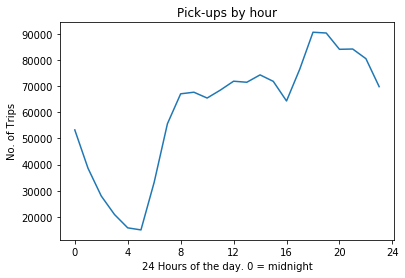

In [27]:
# Check distribution of hours 0-23

df_nyc.groupby(['pickup_hr']).size()


# plot the results
fig, ax = plt.subplots()
ax.xaxis.set_ticks(np.arange(0, 25, 4))
plt.plot(df_nyc.groupby(['pickup_hr']).size())
plt.title("Pick-ups by hour", )
plt.xlabel("24 Hours of the day. 0 = midnight")
plt.ylabel("No. of Trips")

plt.show()


In [28]:
# create a function to determine time of day segments followed by using the function to 
# update the dataframe with a pickup day_seg column
# takes a a couple of minutes to run

def segment(row):
    if row['pickup_hr'] >= 0 and row['pickup_hr'] <= 5:
        val = 'Night'    
    elif row['pickup_hr'] >= 6 and row['pickup_hr'] <= 11:
        val = 'Morning'
    elif row['pickup_hr'] >= 12 and row['pickup_hr'] <= 17:
        val = 'Afternoon'
    else:
        val = 'Evening'
    return val

df_nyc['pickup_day_seg'] = df_nyc.apply(segment, axis=1)

In [29]:
# check pickup day segment created correctly
# check what was loaded

check_seg = df_nyc[['pickup_hr','pickup_day_seg']].drop_duplicates()

check_seg.sort_values('pickup_hr')


,pickup_hr,pickup_day_seg
1,0,Night
43,1,Night
20,2,Night
22,3,Night
169,4,Night
149,5,Night
116,6,Morning
7,7,Morning
17,8,Morning
12,9,Morning


In [30]:
# calculate time difference from dropoff time - pickup time and add this as a column to the dataframe

from datetime import timedelta

df_nyc['calc_tm_diff_in_min'] = (df_nyc['dropoff_datetime'] - df_nyc['pickup_datetime']) / timedelta(minutes=1)

df_nyc['calc_tm_diff_in_min'] = round(df_nyc['calc_tm_diff_in_min'],2)

df_nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_dayofwk_num,pickup_dayofwk_nm,pickup_weekend,pickup_hr,pickup_day_seg,calc_tm_diff_in_min
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,7.580,0,Monday,Weekday,17,Afternoon,7.580
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,11.050,6,Sunday,Weekend,0,Night,11.050
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,35.400,1,Tuesday,Weekday,11,Morning,35.400
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,7.150,2,Wednesday,Weekday,19,Evening,7.150
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,7.250,5,Saturday,Weekend,13,Afternoon,7.250


In [31]:
# confirm time diff from timestamps  match the trip_duration, now in minutes.
df_nyc['calc_tm_diff_in_min'].any() == df_nyc['trip_duration'].any()

True

In [32]:
# Determine if any of the dates in our data are a US Holiday

from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2016-01-01', end='2016-06-30').to_pydatetime()

df_holidays = pd.DataFrame(data=holidays)

df_holidays = df_holidays.rename(columns={0: 'Holiday'})

df_holidays['Holiday'] = df_holidays.Holiday.values.astype('M8[D]')

df_holidays

,Holiday
0,2016-01-01
1,2016-01-18
2,2016-02-15
3,2016-05-30


In [33]:
# create a column that will be dropped in our core dataframe that just has the date portion of pickup date time

df_nyc['pickup_date'] = df_nyc['pickup_datetime']
df_nyc['pickup_date'] = df_nyc.pickup_date.values.astype('M8[D]')
                       #pd.to_datetime(df_nyc['pickup_date']) #df_nyc['pickup_date'].apply(lambda x: x.date())

df_nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_dayofwk_num,pickup_dayofwk_nm,pickup_weekend,pickup_hr,pickup_day_seg,calc_tm_diff_in_min,pickup_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,7.580,0,Monday,Weekday,17,Afternoon,7.580,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,11.050,6,Sunday,Weekend,0,Night,11.050,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,35.400,1,Tuesday,Weekday,11,Morning,35.400,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,7.150,2,Wednesday,Weekday,19,Evening,7.150,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,7.250,5,Saturday,Weekend,13,Afternoon,7.250,2016-03-26


In [34]:
# Identify holidays in the primary dataframe

df_nyc = pd.merge(left=df_nyc, left_on='pickup_date',
         right=df_holidays, right_on='Holiday', how='left')

df_nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_dayofwk_num,pickup_dayofwk_nm,pickup_weekend,pickup_hr,pickup_day_seg,calc_tm_diff_in_min,pickup_date,Holiday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,7.580,0,Monday,Weekday,17,Afternoon,7.580,2016-03-14,NaT
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,11.050,6,Sunday,Weekend,0,Night,11.050,2016-06-12,NaT
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,35.400,1,Tuesday,Weekday,11,Morning,35.400,2016-01-19,NaT
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,7.150,2,Wednesday,Weekday,19,Evening,7.150,2016-04-06,NaT
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,7.250,5,Saturday,Weekend,13,Afternoon,7.250,2016-03-26,NaT


In [35]:
# Create True/False for holiday travel based on US Holdiay Series created above.
df_nyc['is_holiday'] = df_nyc.pickup_date == df_nyc['Holiday']

# show some examples of days that are a holiday
df_nyc.query('is_holiday == True')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_dayofwk_num,pickup_dayofwk_nm,pickup_weekend,pickup_hr,pickup_day_seg,calc_tm_diff_in_min,pickup_date,Holiday,is_holiday
52,id0675800,2,2016-02-15 09:25:15,2016-02-15 09:35:49,6,-73.978,40.755,-74.002,40.756,N,10.570,0,Monday,Weekday,9,Morning,10.570,2016-02-15,2016-02-15,True
121,id2648478,1,2016-01-18 11:13:59,2016-01-18 11:18:56,1,-73.952,40.766,-73.960,40.761,N,4.950,0,Monday,Weekday,11,Morning,4.950,2016-01-18,2016-01-18,True
164,id3620795,1,2016-01-01 10:45:24,2016-01-01 10:51:47,1,-74.002,40.741,-73.996,40.726,N,6.380,4,Friday,Weekday,10,Morning,6.380,2016-01-01,2016-01-01,True
190,id1674373,2,2016-02-15 17:52:27,2016-02-15 18:02:13,5,-74.007,40.741,-74.017,40.705,N,9.770,0,Monday,Weekday,17,Afternoon,9.770,2016-02-15,2016-02-15,True
210,id2677357,2,2016-02-15 16:36:19,2016-02-15 16:41:50,2,-73.972,40.782,-73.982,40.779,N,5.520,0,Monday,Weekday,16,Afternoon,5.520,2016-02-15,2016-02-15,True
211,id2336715,2,2016-01-01 00:09:03,2016-01-01 00:19:25,2,-73.984,40.749,-73.996,40.716,N,10.370,4,Friday,Weekday,0,Night,10.370,2016-01-01,2016-01-01,True
321,id3013319,2,2016-02-15 22:28:54,2016-02-15 22:30:27,1,-73.981,40.779,-73.977,40.782,N,1.550,0,Monday,Weekday,22,Evening,1.550,2016-02-15,2016-02-15,True
328,id2640178,1,2016-02-15 16:12:24,2016-02-15 16:31:27,1,-73.954,40.764,-73.996,40.716,N,19.050,0,Monday,Weekday,16,Afternoon,19.050,2016-02-15,2016-02-15,True
346,id0861216,2,2016-01-18 13:00:37,2016-01-18 13:10:57,1,-73.990,40.757,-73.964,40.757,N,10.330,0,Monday,Weekday,13,Afternoon,10.330,2016-01-18,2016-01-18,True
503,id3838936,1,2016-02-15 00:21:31,2016-02-15 00:24:17,2,-73.994,40.741,-73.999,40.742,N,2.770,0,Monday,Weekday,0,Night,2.770,2016-02-15,2016-02-15,True


In [36]:
# Create a Passenger Category Column
# This takes a little time
def passenger(row):
    if row['passenger_count'] >= 1 and row['passenger_count'] <= 4:
        value = '1-4 Passengers'    
    elif row['passenger_count'] >= 5 and row['passenger_count'] <= 6:
        value = '5-6 Passengers'
    else:
        value = 'To be deleted'
    return value

df_nyc['passenger_grp'] = df_nyc.apply(passenger, axis=1)

df_nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_dayofwk_num,pickup_dayofwk_nm,pickup_weekend,pickup_hr,pickup_day_seg,calc_tm_diff_in_min,pickup_date,Holiday,is_holiday,passenger_grp
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,...,0,Monday,Weekday,17,Afternoon,7.580,2016-03-14,NaT,False,1-4 Passengers
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,...,6,Sunday,Weekend,0,Night,11.050,2016-06-12,NaT,False,1-4 Passengers
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,...,1,Tuesday,Weekday,11,Morning,35.400,2016-01-19,NaT,False,1-4 Passengers
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,...,2,Wednesday,Weekday,19,Evening,7.150,2016-04-06,NaT,False,1-4 Passengers
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,...,5,Saturday,Weekend,13,Afternoon,7.250,2016-03-26,NaT,False,1-4 Passengers


In [37]:
check_pass = df_nyc[['passenger_count','passenger_grp']].drop_duplicates()

check_pass.sort_values('passenger_count')

,passenger_count,passenger_grp
62744,0,To be deleted
0,1,1-4 Passengers
12,2,1-4 Passengers
36,3,1-4 Passengers
6,4,1-4 Passengers
69,5,5-6 Passengers
5,6,5-6 Passengers
433304,7,To be deleted
826064,8,To be deleted
436047,9,To be deleted


In [38]:
# derive a calculated distance travelled in KM

import math

lon1, lat1, lon2, lat2 = map(np.radians, [df_nyc.pickup_longitude, df_nyc.pickup_latitude, df_nyc.dropoff_longitude, df_nyc.dropoff_latitude])

dlon = lon2 - lon1
dlat = lat2 - lat1

a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

c = 2 * np.arcsin(np.sqrt(a))

km = 6367 * c

df_km = pd.DataFrame(km)

df_km.columns = ['distance_calc']

#update the dataframe with the distance calculation
df_nyc = pd.concat([df_nyc, df_km], axis=1)

# create a column that is a rounded value.  ie 1.497580 rounds to 1.500 Km
df_nyc['distance_km'] = np.round(df_nyc.distance_calc,3)

df_nyc.drop(['distance_calc'], axis = 1, inplace = True)

df_nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_dayofwk_nm,pickup_weekend,pickup_hr,pickup_day_seg,calc_tm_diff_in_min,pickup_date,Holiday,is_holiday,passenger_grp,distance_km
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,...,Monday,Weekday,17,Afternoon,7.580,2016-03-14,NaT,False,1-4 Passengers,1.498
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,...,Sunday,Weekend,0,Night,11.050,2016-06-12,NaT,False,1-4 Passengers,1.804
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,...,Tuesday,Weekday,11,Morning,35.400,2016-01-19,NaT,False,1-4 Passengers,6.381
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,...,Wednesday,Weekday,19,Evening,7.150,2016-04-06,NaT,False,1-4 Passengers,1.485
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,...,Saturday,Weekend,13,Afternoon,7.250,2016-03-26,NaT,False,1-4 Passengers,1.188


In [39]:
# lastly, re-order columns in a data frame so new columns are grouped with original data

df_nyc = df_nyc[['id', 'vendor_id', 'pickup_datetime','dropoff_datetime',
                         'pickup_dayofwk_num','pickup_dayofwk_nm','pickup_weekend','pickup_hr',
                         'pickup_day_seg','is_holiday','pickup_longitude','pickup_latitude','dropoff_longitude',
                         'dropoff_latitude','store_and_fwd_flag','trip_duration','calc_tm_diff_in_min',
                         'passenger_count','passenger_grp','distance_km']]

df_nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_dayofwk_num,pickup_dayofwk_nm,pickup_weekend,pickup_hr,pickup_day_seg,is_holiday,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,calc_tm_diff_in_min,passenger_count,passenger_grp,distance_km
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,0,Monday,Weekday,17,Afternoon,False,-73.982,40.768,-73.965,40.766,N,7.580,7.580,1,1-4 Passengers,1.498
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,6,Sunday,Weekend,0,Night,False,-73.980,40.739,-73.999,40.731,N,11.050,11.050,1,1-4 Passengers,1.804
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,Tuesday,Weekday,11,Morning,False,-73.979,40.764,-74.005,40.710,N,35.400,35.400,1,1-4 Passengers,6.381
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,2,Wednesday,Weekday,19,Evening,False,-74.010,40.720,-74.012,40.707,N,7.150,7.150,1,1-4 Passengers,1.485
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,5,Saturday,Weekend,13,Afternoon,False,-73.973,40.793,-73.973,40.783,N,7.250,7.250,1,1-4 Passengers,1.188


In [40]:
# Randomly select 10 lat/longs to confirm accuracy of method.
# put lat and long into http://www.meridianoutpost.com/resources/etools/calculators/calculator-latitude-longitude-distance.php?
# exact results as website
# This is as-the-crow-flys, so as an approximation it will be helpful.
#  determining the corelation between distance and time might help define the accuracy of the dist results. 


df_nyc[['pickup_latitude','pickup_longitude','dropoff_latitude', 'dropoff_longitude' , 'distance_km']].sample(n=10)

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance_km
1150034,40.746,-73.985,40.762,-73.967,2.297
324061,40.769,-73.982,40.790,-73.977,2.364
319936,40.755,-73.973,40.726,-74.006,4.170
793415,40.740,-74.006,40.708,-74.017,3.663
971982,40.724,-74.005,40.728,-74.007,0.469
573110,40.708,-74.002,40.752,-73.977,5.253
1367681,40.794,-73.970,40.781,-73.959,1.752
565034,40.732,-74.004,40.712,-73.959,4.335
1429880,40.733,-73.994,40.705,-74.007,3.275
878711,40.738,-73.991,40.770,-73.957,4.520


In [41]:
df_nyc.distance_km.describe()

count   1458644.000
mean          3.439
std           4.294
min           0.000
25%           1.231
50%           2.092
75%           3.873
max        1240.130
Name: distance_km, dtype: float64

In [42]:
# check row count...should be 1,458,644

len(df_nyc)

1458644

In [43]:
##Data Removal and Drops - based on evaluation of data set
# Edit this fucntion list to adjust what will be removed from data set
def data_drops(data):
    # drop any row with passanger_count of 6..9
    data.drop(data[df_nyc.passenger_count >6].index.tolist(), inplace=True)

    # drop rows with +12 hour trip times
    data.drop(data[data.trip_duration > 720].index.tolist(), inplace = True)

    # drop any trips that last <30 seconds
    data.drop(data[data.trip_duration < 0.5].index.tolist(), inplace = True)
    
    #drop far away trip starts or ends 
    data.drop(data[data.pickup_latitude >= 41].index.tolist(), inplace = True)
    data.drop(data[data.pickup_latitude > 41].index.tolist(), inplace = True)
    data.drop(data[data.dropoff_latitude >= 41].index.tolist(), inplace = True)
    data.drop(data[data.dropoff_latitude > 41].index.tolist(), inplace = True)


    

    try:
    # drop column 'store_and_fwd_flag'
        del data['store_and_fwd_flag']


        # drop column 'trip_duration_in_min'.  It was for validation only

        data.drop(['trip_duration_in_min'], axis = 1, inplace = True)

        # drop columns used to determine Holiday but aren't needed
        data.drop(['pickup_date'], axis = 1, inplace = True)
        data.drop(['Holiday'], axis = 1, inplace = True)
    
    except: 
        pass

# runs the data removal function    
data_drops(df_nyc)
    

In [44]:
len(df_nyc)

1451630

In [45]:
#Add weather data downloaded from https://www.kaggle.com/waypointgroup/impact-of-weather-on-nyc-ride-data
#file needs to be in same directory

weather_data = pd.read_csv("KNYC_Metars.csv")
w_data = weather_data.loc[:,['Time','Temp','Windchill','Wind Speed','Gust Speed','Precip','Conditions']]
w_data['Time'] = pd.to_datetime(w_data['Time'])
w_data['Hour'] = w_data['Time'].dt.hour
w_data['Date'] = w_data['Time'].dt.date

df_nyc['Date'] = df_nyc['pickup_datetime'].dt.date
df_nyc_w = pd.merge(df_nyc, w_data, how='left', left_on=['Date','pickup_hr'], right_on=['Date','Hour'])

df_nyc = df_nyc_w.drop(['Date','Time','Hour'], axis=1)

In [46]:
len(df_nyc)

1451630

In [47]:
df_nyc['Temp'].isnull().sum()

11977

In [48]:
df_nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_dayofwk_num,pickup_dayofwk_nm,pickup_weekend,pickup_hr,pickup_day_seg,is_holiday,...,calc_tm_diff_in_min,passenger_count,passenger_grp,distance_km,Temp,Windchill,Wind Speed,Gust Speed,Precip,Conditions
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,0,Monday,Weekday,17,Afternoon,False,...,7.580,1,1-4 Passengers,1.498,4.400,-0.500,27.800,57.400,0.300,Overcast
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,6,Sunday,Weekend,0,Night,False,...,11.050,1,1-4 Passengers,1.804,28.900,nan,7.400,0.000,0.000,Unknown
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,Tuesday,Weekday,11,Morning,False,...,35.400,1,1-4 Passengers,6.381,-6.700,-14.300,24.100,46.300,0.000,Clear
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,2,Wednesday,Weekday,19,Evening,False,...,7.150,1,1-4 Passengers,1.485,7.200,3.300,25.900,35.200,0.000,Clear
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,5,Saturday,Weekend,13,Afternoon,False,...,7.250,1,1-4 Passengers,1.188,9.400,nan,9.300,0.000,0.000,Clear


In [49]:
# Export revised df as a new dataframe called df_nyc_processed.csv.


# Save the new dataframe as a csv.  
# Using the new df_nyc_processed.csv file for future work will save the time of processing the time category data.
# The data will be saved to the folder containing this notebook as a .csv file. 
# If you have a local copy of df_nyc_processed.csv already , it will confirm you want to overwrite that copy.
# The overwrite protect is useful is someone runs the 'Restart & run all' command but has done additonal work
# to the go forward database: df_nyc_processed.csv.

def writeoutDf():
    if os.path.isfile('df_nyc_processed.csv') == True:
        overwrite = input("Do you want overwrite your local copy of df_nyc_processed.csv   Type: Y / N\n" ).lower()
        if overwrite.startswith('y'):
            print('writing file df_nyc_processed.csv to your local drive...')
            df_nyc.to_csv('df_nyc_processed.csv')
            print('done')
        else:
            print('Nothing to do then.')
    else:
        print('writing file df_nyc_processed.csv to your local drive...')
        df_nyc.to_csv('df_nyc_processed.csv')
        print('done')


writeoutDf()


Do you want overwrite your local copy of df_nyc_processed.csv   Type: Y / N
y
writing file df_nyc_processed.csv to your local drive...
done
